# pandas

## Contenidos 

- Veremos una introducción a las estructuras de datos `DataFrame` y `Series` de la librería *pandas* .
- Veremos como manipular datos dentro de un `DataFrame` y `Series`. 
- Importaremos datos CSV en un `DataFrame`

[*pandas*](http://pandas.pydata.org/) es una API de análisis de datos orientada a columnas. Es una gran herramienta para manejar y analizar datos de entrada, y muchos paquetes de estadística y ML admiten estructuras de datos *pandas* como entradas.
Aunque una introducción completa a la API *pandas* abarcaría muchas páginas, los conceptos básicos son bastante sencillos y los presentaremos a continuación. 

Para una referencia más completa, el [*pandas* docs site](http://pandas.pydata.org/pandas-docs/stable/index.html) contiene documentación extensa y muchos tutoriales.

## pandas: análisis de datos en Python

Para trabajos intensivos en datos en Python, la biblioteca [Pandas](http://pandas.pydata.org) se ha vuelto esencial.

¿Qué es `pandas`?

* Pandas puede considerarse como *arreglos de NumPy con etiquetas* para filas y columnas, y un mejor soporte para tipos de datos heterogéneos, pero también es mucho más que eso. *Los pandas también se pueden considerar como `data.frame` de `R` en Python.
* Son potentes para trabajar con *datos faltantes*, trabajar con datos de *series de tiempo*, leer y escribir datos en diferentes formatos, remodelar, agrupar, fusionar sus datos, ...

- Documentación: http://pandas.pydata.org/pandas-docs/stable/


## Conceptos básicos

La siguiente línea importa la API *pandas* e imprime la versión de la API:

In [ ]:
import pandas as pd

In [ ]:
pd.__version__

Las estructuras de datos primarias en *pandas* se implementan como dos clases:

- **`DataFrame`**, que puedes imaginar como una tabla de datos relacionales, con filas y columnas con nombre.
- **`Series`**, que es una sola columna. Un `DataFrame` contiene una o más `Series` y un nombre para cada `Series`.

Los `DataFrames` son una abstracción de uso común para la manipulación de datos. Existen implementaciones similares en lenguajes como [R](https://www.r-project.org/about.html) y [Julia](https://dataframes.juliadata.org/stable/man/getting_started/).

## Las estructuras de datos de pandas: `DataFrame` y `Series`

Un `DataFrame` es una **estructura de datos tabulares** (objeto multidimensional para contener datos etiquetados) compuesto de filas y columnas, similar a una hoja de cálculo, una tabla de base de datos o un objeto data.frame de R. Puede considerarlo como un objeto Serie múltiple que comparte el mismo índice.

- https://pandas.pydata.org/docs/getting_started/index.html

![DataFrame](https://pandas.pydata.org/docs/_images/01_table_dataframe.svg)

## Crear `Series` y `DataFrame` desde cero

Una forma de crear una `Serie` es construir un objeto `Serie`. Por ejemplo:

In [ ]:
s = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
s

Los objetos `DataFrame` se pueden crear pasando un `dict` mapeando los nombres de las columnas `string` a sus respectivas `Series`. 

- Si las `Series` no coinciden en longitud, los valores faltantes se completan con valores especiales [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html.

In [ ]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

df = pd.DataFrame({ 'City name': city_names, 'Population': population })
df

## Cargar datos desde un archivo CSV

- Y otros formatos: https://pandas.pydata.org/docs/getting_started/index.html

In [2]:
titanic_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

In [3]:
df = pd.read_csv(titanic_url)

In [4]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## ¿Qué puedes hacer con los pandas?

Desde leer este conjunto de datos hasta responder preguntas sobre estos datos en unas pocas líneas de código:

**¿Cuál es la distribución por edades de los pasajeros?**

In [ ]:
df['Age'].hist()

**¿Cómo difiere la tasa de supervivencia de los pasajeros entre sexos?**

In [ ]:
(df
    .groupby('Sex')[['Survived']] 
    .aggregate(lambda x: x.sum() / len(x)))

**¿O cómo difiere entre las diferentes clases?**

In [ ]:
df \
    .groupby('Pclass')['Survived']\
    .aggregate(lambda x: x.sum() / len(x))\
    .plot(kind='bar')

***

## Atributos de un `Series`: `index` y `values`

La Serie tiene un atributo `index` y `values`, pero no tiene `columns`

In [ ]:
age = df['Age']
type(age)

In [ ]:
age.index

Puede acceder a la representación de matriz numpy subyacente con el atributo `.values`:

In [ ]:
age.values[:10]

Podemos acceder a los valores de la serie a través del índice, al igual que para las matrices NumPy:

In [ ]:
age[0]

Sin embargo, a diferencia de la matriz NumPy, este índice puede ser algo más que números enteros:

In [ ]:
df2 = df.set_index('Name')
df2.head()

In [ ]:
age = df2['Age']
age

In [ ]:
age['Dooley, Mr. Patrick']

pero con el poder de las matrices numpy. Muchas cosas que puede hacer con matrices numpy también se pueden aplicar en DataFrames / Series.

Por ejemplo, operaciones elementales:

In [ ]:
age * 1000

Una gama de métodos:

In [ ]:
age.mean()

Indexación sofisticada, como la indexación con una lista o la indexación booleana:

In [ ]:
age[age > 70]

Pero también muchos métodos específicos de pandas, p.

In [ ]:
df['Embarked'].value_counts()

***

# Atributos del `DataFrame`

Un DataFrame tiene además de un atributo `index`, también un atributo `columns`:

In [ ]:
df.index

In [ ]:
df.columns

Para comprobar los tipos de datos de las diferentes columnas:

In [ ]:
df.dtypes

Se puede dar una visión general de esa información con el método `info()`:

In [ ]:
df.info()

También un DataFrame tiene un atributo `values`, pero atención: cuando tiene datos heterogéneos, todos los valores serán **upcasted**:

In [ ]:
df.values

***

## Cargar archivos CSV desde URL

Pero la mayoría de las veces, carga un archivo completo en un `DataFrame`. El siguiente ejemplo carga un archivo con datos de precios de viviendas de California. Ejecutamos la siguiente celda para cargar los datos y crear la definición de características:

In [ ]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

El ejemplo anterior usó `DataFrame.describe` para mostrar estadísticas interesantes sobre un `DataFrame`. Otra función útil es `DataFrame.head`, que muestra los primeros registros de un `DataFrame`:

In [ ]:
california_housing_dataframe.head()

Otra poderosa característica de *pandas* son los gráficos. Por ejemplo, `DataFrame.hist` te permite estudiar rápidamente la distribución de valores en una columna:

In [ ]:
# california_housing_dataframe.hist?

In [ ]:
california_housing_dataframe.hist('housing_median_age')

## Acceso a los datos

Podemos acceder a los datos de `DataFrame` utilizando operaciones familiares de diccionarios/listas de Python:

In [ ]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(type(cities['City name']))
cities['City name']

In [ ]:
print(type(cities['City name'][1]))
cities['City name'][1]

In [ ]:
print(type(cities[0:2]))
cities[0:2]

Además, *pandas* proporciona una API extremadamente rica para [indexación y selección] avanzadas (http://pandas.pydata.org/pandas-docs/stable/indexing.html) que es demasiado extensa para cubrirla. aquí.

## Manipulación de datos

Podemos aplicar las operaciones aritméticas básicas de Python a `Series`. Por ejemplo:

In [ ]:
population / 1000.

[NumPy](http://www.numpy.org/) es un conjunto de herramientas popular para la computación científica. *pandas* `Series` se puede usar como argumento para la mayoría de las funciones NumPy:

In [ ]:
import numpy as np

np.log(population)

Para transformaciones de una sola columna más complejas, puede usar `Series.apply`. Al igual que la [función de mapa] de Python (https://docs.python.org/2/library/functions.html#map),
`Series.apply` acepta como argumento una [función lambda](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions), que se aplica a cada valor.

El siguiente ejemplo crea una nueva 'Serie' que indica si la 'población' supera el millón:

In [ ]:
population.apply(lambda val: val > 1000000)

Modificar `DataFrames` también es sencillo. Por ejemplo, el siguiente código agrega dos `Series` a un `DataFrame` existente:

In [ ]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

# Seleccionar y filtrar datos

<div class="alert alert-warning">
<b>¡ATENCIÓN!</b>: <br><br>

Una de las características básicas de pandas es el etiquetado de filas y columnas, pero esto hace que la indexación también sea un poco más compleja en comparación con numpy. <br><br> Ahora tenemos que distinguir entre:
- Selección por etiqueta
- Selección por posición


In [ ]:
df = pd.read_csv(titanic_url)

### `df[]` proporciona algunos atajos convenientes

Para un DataFrame, la indexación básica selecciona las columnas se puede hacer con `[]`.

Seleccionando una sola columna:

In [ ]:
df['Age']

o varias columnas:

In [ ]:
df[['Age', 'Fare']]

Pero, el indexado con valores numéricos accede a las filas:

In [ ]:
df[10:15]

## Indexación sistemática con `loc` y `iloc`

Cuando utilizamos `[]` como arriba, solo podemos seleccionar de un eje a la vez (filas o columnas, no ambos). Para una indexación más avanzada, tenemos algunos atributos adicionales:
    
* `loc`: selección por etiqueta
* `iloc`: selección por posición

In [ ]:
df = df.set_index('Name')

In [ ]:
df.loc['Bonnell, Miss. Elizabeth', 'Fare']

In [ ]:
df.loc['Bonnell, Miss. Elizabeth':'Andersson, Mr. Anders Johan', :]

Seleccionar por posición con `iloc` funciona de manera similar a indexar matrices numpy:

In [ ]:
df.iloc[0:2,1:3]

Los diferentes métodos de indexación también se pueden utilizar para asignar datos:

In [ ]:
df.loc['Braund, Mr. Owen Harris', 'Survived'] = 100

In [ ]:
df

## Indexación booleana (filtrado)

A menudo, es deseable seleccionar filas en función de una determinada condición. Esto se puede hacer con 'indexación booleana' (como una cláusula *where* en SQL) y comparable al indexado booleano de numpy.

El indexador (o la máscara booleana) debe ser unidimensional y de la misma longitud que el elemento indexado.

In [ ]:
df['Fare'] > 50

In [ ]:
df[df['Fare'] > 50]

# The *group-by* operation

In [ ]:
df = pd.read_csv(titanic_url)

### Groupby: applying functions per group

El concepto de "agrupar por": queremos **aplicar la misma función en subconjuntos de su marco de datos, en función de alguna clave para dividir el marco de datos en subconjuntos**

Esta operación también se conoce como la operación "dividir-aplicar-combinar", y comprende los siguientes pasos:

* **Dividir** los datos en grupos según algunos criterios
* **Aplicar** una función a cada grupo de forma independiente
* **Combinar** los resultados en una estructura de datos

![splitApplyCombine](images/pandas/split-apply-combine.jpg)

Similar a la sentencia de SQL `GROUP BY`

En lugar de hacer el filtrado manual como se indica arriba

    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

pandas proporciona el método `groupby` para hacer exactamente esto:

In [ ]:
df.groupby('Pclass').sum()

In [ ]:
df.groupby('Pclass').aggregate(np.sum)  # 'sum'

Y también tenemos muchos más métodos disponibles:

In [ ]:
df.groupby('Pclass')['Age'].mean()

## Otros temas a revisar

- https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

- Concatenar datos: `pd.concat`
- Unión de DataFrames: `pd.merge`
- Pivotear datos: `pivot_table`, `melt`, `stack`, `unstack`
- Trabajar con datos faltantes: `isnull`, `dropna`, `interpolate`, ...
- mucho más...

## Otras lecturas

* Documentación de Pandas: http://pandas.pydata.org/pandas-docs/stable/
* Libros

    * "Python para análisis de datos" por Wes McKinney
    * "Python Data Science Handbook" por Jake VanderPlas
        - Revisar el capítulo de "Trabajando con series de tiempo"

* Tutoriales (¡muchos buenos tutoriales en línea!)
    * https://github.com/jorisvandenbossche/pandas-tutorial
    * https://github.com/brandon-rhodes/pycon-pandas-tutorial

## Ejercicios

- Con el chivo en PDF de arriba y el conjunto de datos del Titanic, realizar 10 ejemplos con métodos o funciones no vistas en este cuaderno. 

In [1]:
import pandas as pd

In [7]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [10]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
602,603,0,1,"Harrington, Mr. Charles H",male,NaN,0,0,113796,42.4000,NaN,S
653,654,1,3,"O'Leary, Miss. Hanora ""Norah""",female,NaN,0,0,330919,7.8292,NaN,Q
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C
714,715,0,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.0000,NaN,S
611,612,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S


- Revisar el capítulo "Trabajando con series de tiempo" del libro "Python Data Science Handbook". 
    - Descargar una serie temporal de frecuencia diaria (con al menos 3 años de datos disponibles) y cargarla en un DataFrame de pandas.
    - Desarrollar las operaciones necesarias para obtener un DataFrame que resuma los promedios mensuales en un DataFrame. El `index` del DataFrame debe ser un `DatetimeIndex` con frecuencia mensual. 
    - Obtener un DataFrame con las variaciones intermensuales del anterior. Se puede trabajar también agregando una columna adicional. 
    - Realizar el mismo ejercicio para obtener el promedio trimestral. 
    - Obtener un DataFrame con una media móvil de 4 períodos del promedio trimestral.

In [6]:
# pd.date_range?

In [21]:
df.filter(regex='Moran')

""
0
1
2
3
4
...
886
887
888
889


In [22]:
df[df['Fare'] > 50]],df.filter(regex='Moran')

SyntaxError: unmatched ']' (Temp/ipykernel_11716/101629901.py, line 1)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

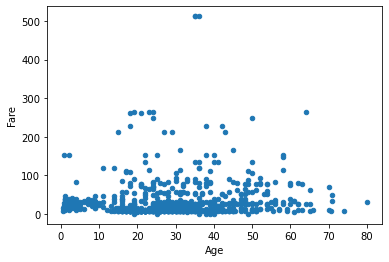

In [26]:
df.plot.scatter(x='Age',y='Fare')


In [36]:
#Filtarado con Regular Expresion ()
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html
df.filter(regex='111$', axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C


In [38]:
df2.filter(regex='Allen', axis= 1)

""
Name
"Braund, Mr. Owen Harris"
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)"
"Heikkinen, Miss. Laina"
"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
"Allen, Mr. William Henry"
...
"Montvila, Rev. Juozas"
"Graham, Miss. Margaret Edith"
"Johnston, Miss. Catherine Helen ""Carrie"""


In [40]:
df2 = df.set_index("Name")
df2.filter(regex="Owen", axis =0)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.25,NaN,S
"Allum, Mr. Owen George",835,0,3,male,18.0,0,0,2223,8.30,NaN,S


In [41]:
df.set_index("Name").filter(regex="e$", axis =0)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Rice, Master. Eugene",17,0,3,male,2.0,4,1,382652,29.1250,NaN,Q
"Williams, Mr. Charles Eugene",18,1,2,male,NaN,0,0,244373,13.0000,NaN,S
"Beesley, Mr. Lawrence",22,1,2,male,34.0,0,0,248698,13.0000,D56,S
"Laroche, Miss. Simonne Marie Anne Andree",44,1,2,female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
"Icard, Miss. Amelie",62,1,1,female,38.0,0,0,113572,80.0000,B28,NaN
...,...,...,...,...,...,...,...,...,...,...,...
"Reuchlin, Jonkheer. John George",823,0,1,male,38.0,0,0,19972,0.0000,NaN,S
"Mallet, Master. Andre",828,1,2,male,1.0,0,2,S.C./PARIS 2079,37.0042,NaN,C
"Allum, Mr. Owen George",835,0,3,male,18.0,0,0,2223,8.3000,NaN,S


In [42]:
pd.merge(df,df2, how="left", on="Name")

,PassengerId_x,Survived_x,Pclass_x,Name,Sex_x,Age_x,SibSp_x,Parch_x,Ticket_x,Fare_x,...,Survived_y,Pclass_y,Sex_y,Age_y,SibSp_y,Parch_y,Ticket_y,Fare_y,Cabin_y,Embarked_y
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,1,1,male,26.0,0,0,111369,30.0000,C148,C
